<a href="https://colab.research.google.com/github/mordor-ai/deep_learning/blob/master/DEEP_LEARNING_TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
!nvidia-smi
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
base =  tf.keras.datasets.cifar100.load_data()
# on normalise
data_train= base[0][0]/255.00
# on normalise en divisant par 255
data_test =  base [1][0]/255.00
label_train = base[0][1]
label_test =base[1][1]

print(data_train.shape)

1.15.0
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for up

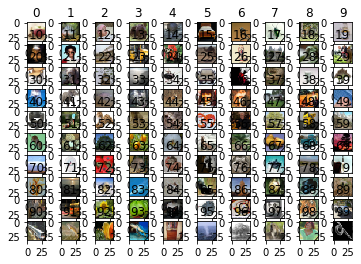

In [0]:
for i in range(0,100):
  j= data_train[label_train[:,0]==i][0]
  plt.subplot(10,10,i+1)
  plt.imshow(j)
  plt.title(str(i))

plt.show()

In [0]:
tf.reset_default_graph()
data = tf.placeholder(tf.float32, shape=(None,32,32,3))
label =  tf.placeholder(tf.float32, shape=(None,100))


In [0]:
def conv2d (in_,name, kernel_size, 
            filters, ## nombre de neurones de la couche
            stride =1,
            padding="SAME" , activation="relu"):
  num_in_channels =  in_.get_shape()[-1].value
  kernel_shape = [kernel_size,kernel_size, num_in_channels, filters]
  biases =  tf.get_variable(name=name+"/bias",
                            shape = [filters],
                            trainable= True,
                            initializer = tf.constant_initializer(0.1))
  kernel =  tf.get_variable(shape=  kernel_shape,
                            initializer = tf.contrib.layers.xavier_initializer(),
                            trainable= True, name =  name+"/kernel")
  outputs =   tf.nn.conv2d( in_,
                            kernel,
                            [1,stride,stride,1], 
                            padding =  padding) 
  outputs =  tf.nn.bias_add(outputs, biases)
  if activation =='relu':
      return tf.nn.relu(outputs)
  elif  activation== 'rien':
    return outputs

BATCH_SIZE=16





In [0]:
c =  conv2d(in_=data, kernel_size=5,filters=64,stride=1, name="conv1")
c =  conv2d(in_=c, kernel_size=3,filters=96,stride=2, name="conv2")
c =  conv2d(in_=c, kernel_size=3,filters=128, name="conv3")
#c.shape ? 16X16X128

c =  conv2d(in_=c, kernel_size=16,filters=512,padding="VALID" ,name="conv4")
#c.shape ? 1X1X512,

c =  conv2d(in_=c, kernel_size=1,filters=100,padding="SAME" ,name="conv5", activation="rien")

#c.shape ? 1X1X100
out=  tf.squeeze(c)
#c.shape ? 100


In [0]:
softmax_loss =  tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=label, logits=out)
)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# on definit le sgb
optimizer  = tf.train.GradientDescentOptimizer(0.01)
train= optimizer.minimize(softmax_loss)

ValueError: ignored

In [0]:
# decalration de la session
sess=  tf.Session()
# initialisationd es varaibvles
init =  tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [0]:
# vector 42 X (28X28)

# Labels 42 X (10)

import random
# cette fonction permet d'extraire de façon aléatoire les images et labels 
def getTrainBatch (size):
  images =  np.zeros((size,28*28))
  labels = np.zeros((size,10))
  for i in range(0, size):
    r = random.randint(0,data_train.shape[0]-1)
    images[i] = data_train[r]
    labels[i,label_train[r]] =1
  return images, labels




In [0]:
for i  in range(10000):
  im, l =  getTrainBatch(42)
  #tmp = sess.run(p3, feed_dict={data:im, label:l})
  loss, _ =  sess.run([softmax_loss,train],feed_dict={data:im, label:l})
  
  if i%100==00:
    #print(loss)
    pred = sess.run(out, feed_dict={data:eval_data})
    argmax =  np.argmax(pred, axis=1)
   # print(argmax)
    print (str(i)+ " => " + str(np.sum(argmax==eval_labels)/float(eval_labels.shape[0])))
    
 #argmax(vecture de la dernire couche  ) => comprae à  la réalité trerrain donne l'accuracy

NameError: ignored